<a href="https://colab.research.google.com/github/zadel28/nyu-python-public-policy/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9,18,21,32,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
set(df.complaint_type)

{'APPLIANCE',
 'Abandoned Vehicle',
 'Advocate - Lien',
 'Advocate - Other',
 'Advocate - RPIE',
 'Advocate-Co-opCondo Abatement',
 'Advocate-Commercial Exemptions',
 'Advocate-Personal Exemptions',
 'Advocate-Prop Refunds/Credits',
 'Advocate-Property Value',
 'Air Quality',
 "Alzheimer's Care",
 'Animal Abuse',
 'Animal Facility - No Permit',
 'Animal in a Park',
 'Animal-Abuse',
 'Asbestos',
 'BEST/Site Safety',
 'Beach/Pool/Sauna Complaint',
 'Benefit Card Replacement',
 'Bereavement Support Group',
 'Bike Rack Condition',
 'Bike/Roller/Skate Chronic',
 'Blocked Driveway',
 'Boilers',
 'Borough Office',
 'Bottled Water',
 'Bridge Condition',
 'Broken Parking Meter',
 'Building Marshals office',
 'Building/Use',
 'Bus Stop Shelter Complaint',
 'Bus Stop Shelter Placement',
 'Calorie Labeling',
 'Case Management Agency Complaint',
 'Collection Truck Noise',
 'Comments',
 'Construction Safety Enforcement',
 'Consumer Complaint',
 'Cooling Tower',
 'Cranes and Derricks',
 'Curb Conditi

In [0]:
def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

df['borocd'] = df.apply(recode_borocd_counts, axis=1)

In [0]:
noise_complaint = df[df.complaint_type == 'Noise - Residential']

In [0]:
water_complaint = df[df.complaint_type == 'HEAT/HOT WATER']

In [0]:
other_complaint = df[(df.complaint_type != 'Noise - Residential') & (df.complaint_type != 'HEAT/HOT WATER')]

In [10]:
count_noise = noise_complaint.groupby('community_board').size().reset_index(name='count_311_noise')
print(len(count_noise))

count_water = water_complaint.groupby('community_board').size().reset_index(name='count_311_water')
print(len(count_water))

count_other = other_complaint.groupby('community_board').size().reset_index(name='count_311_other')
print(len(count_other))

count_all = df.groupby('community_board').size().reset_index(name='count_311_total')
print(len(count_all))

69
66
77
77


In [0]:
count_noise['borocd'] = count_noise.apply(recode_borocd_counts, axis=1)

count_water['borocd'] = count_water.apply(recode_borocd_counts, axis=1)

count_other['borocd'] = count_other.apply(recode_borocd_counts, axis=1)

count_all['borocd'] = count_all.apply(recode_borocd_counts, axis=1)

In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [13]:
count_noise = count_noise[count_noise.borocd.isin(valid_borocds)]
print(len(count_noise))

count_water = count_water[count_water.borocd.isin(valid_borocds)]
print(len(count_water))

count_other = count_other[count_other.borocd.isin(valid_borocds)]
print(len(count_other))

count_all = count_all[count_all.borocd.isin(valid_borocds)]
print(len(count_all))

59
59
59
59


In [14]:
print(count_noise.head())
print(count_water.head())
print(count_other.head())
print(count_all.head())

    community_board  count_311_noise borocd
1          01 BRONX             3691    201
2       01 BROOKLYN             5844    301
3      01 MANHATTAN              722    101
4         01 QUEENS             4589    401
5  01 STATEN ISLAND             5052    501
    community_board  count_311_water borocd
0          01 BRONX             3346    201
1       01 BROOKLYN             2868    301
2      01 MANHATTAN              276    101
3         01 QUEENS             2466    401
4  01 STATEN ISLAND             1644    501
    community_board  count_311_other borocd
1          01 BRONX            20316    201
2       01 BROOKLYN            59389    301
3      01 MANHATTAN            20261    101
4         01 QUEENS            53370    401
5  01 STATEN ISLAND            58449    501
    community_board  count_311_total borocd
1          01 BRONX            27353    201
2       01 BROOKLYN            68101    301
3      01 MANHATTAN            21259    101
4         01 QUEENS            6

Create a stacked bar chart of 311 requests per community district. Each community district bar should be comprised of three stacked bars, one for each category listed below. The total height of each community district bar (the sum of the three stacked bars) should reflect the total count of 311 complaints per community district.

In [0]:
position_on_x = np.arange(len(count_all))

In [0]:
noise = np.array(count_noise.sort_values(by='count_311_noise', ascending=False).count_311_noise)
water = np.array(count_water.sort_values(by='count_311_water', ascending=False).count_311_water)
other = np.array(count_other.sort_values(by='count_311_other', ascending=False).count_311_other)

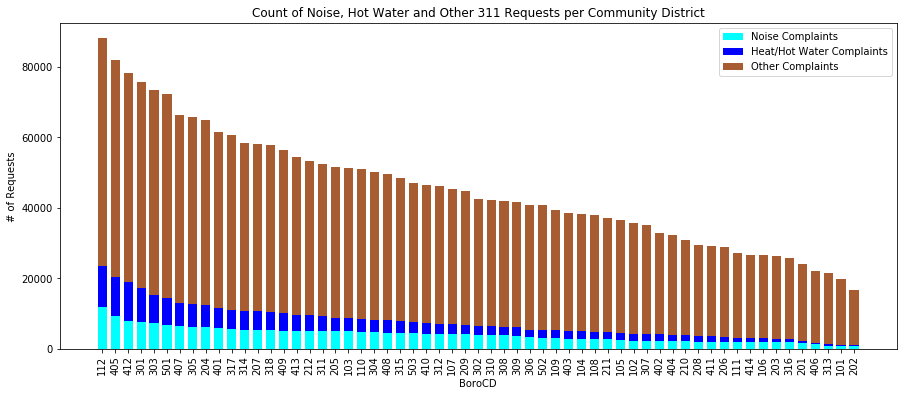

In [32]:
plt.figure(figsize=(15, 6))

plot1 = plt.bar(
  position_on_x,
  noise,
  align='center',
  color='cyan',
  width=0.7,
  label='Noise Complaints'
)

plot2 = plt.bar(
  position_on_x,
  water,
  bottom=noise, 
  align='center',
  color='blue',
  width=0.7,
  label='Heat/Hot Water Complaints'
)

plot3 = plt.bar(
  position_on_x,
  other,
  bottom=noise + water, 
  align='center',
  color='#a85c32',
  width=0.7,
  label='Other Complaints'
)

plt.xticks(position_on_x, count_all.sort_values(by='count_311_total', ascending=False).borocd, rotation=90)

plt.title('Count of Noise, Hot Water and Other 311 Requests per Community District')
plt.xlabel('BoroCD')
plt.ylabel('# of Requests')
plt.legend()

plt.show()

Using the same three dataframes created in Step 1, create a scatter plot of community district population (x-axis) vs. community district 311 counts (y-axis) split out by complaint category (noise, heat/water, other). The scatter plot should show the counts of each of the three complaint categories in a different color.

In [19]:
population = pd.read_csv('https://data.cityofnewyork.us/api/views/xi7c-iiu2/rows.csv?accessType=DOWNLOAD', header='infer')
population.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


In [20]:
def recode_borocd_pop(row):
  if row.Borough == 'Manhattan':
    return str(100 + row['CD Number'])
  elif row.Borough == 'Bronx':
    return str(200 + row['CD Number'])
  elif row.Borough == 'Brooklyn':
    return str(300 + row['CD Number'])
  elif row.Borough == 'Queens':
    return str(400 + row['CD Number'])
  elif row.Borough == 'Staten Island':
    return str(500 + row['CD Number'])
  else:
    return 'Invalid borocd'

population['borocd'] = population.apply(recode_borocd_pop, axis=1)
print(population['borocd'])

0     201
1     202
2     203
3     204
4     205
5     206
6     207
7     208
8     209
9     210
10    211
11    212
12    301
13    302
14    303
15    304
16    305
17    306
18    307
19    308
20    309
21    310
22    311
23    312
24    313
25    314
26    315
27    316
28    317
29    318
30    101
31    102
32    103
33    104
34    105
35    106
36    107
37    108
38    109
39    110
40    111
41    112
42    401
43    402
44    403
45    404
46    405
47    406
48    407
49    408
50    409
51    410
52    411
53    412
54    413
55    414
56    501
57    502
58    503
Name: borocd, dtype: object


In [0]:
merged_noise = pd.merge(left=count_noise, right=population, left_on='borocd', right_on='borocd')

In [0]:
merged_water = pd.merge(left=count_water, right=population, left_on='borocd', right_on='borocd')

In [0]:
merged_other = pd.merge(left=count_other, right=population, left_on='borocd', right_on='borocd')

In [0]:
noise_group = [ 
  [merged_noise['2010 Population']/1000],
  [merged_noise.count_311_noise]
]

water_group = [
  [merged_water['2010 Population']/1000],
  [merged_water.count_311_water]
]

other_group = [ 
  [merged_other['2010 Population']/1000],
  [merged_other.count_311_other]
]

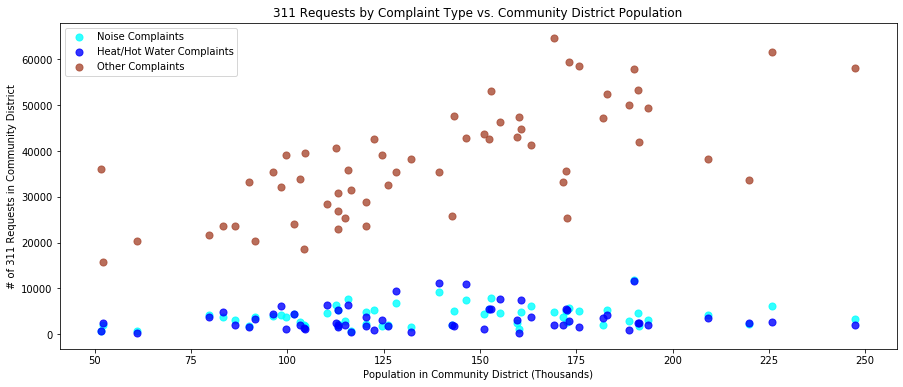

In [35]:
x = np.array(population['2010 Population']/1000)
y = np.array(count_all.count_311_total)

data_per_complaint = [noise_group, water_group, other_group]

# define the color to be used for the markers for each data subset group
colors = ["cyan", "blue", "#a84a32"]

# define the labels to be used for the data subset group
groups = ["Noise Complaints", "Heat/Hot Water Complaints", "Other Complaints"]

plt.figure(figsize=(15,6))

# create a for loop that adds a scatterplot to the figure for each data subset group
for data, color, group in zip(data_per_complaint, colors, groups): 
  x, y = data
  plt.scatter(x, y, alpha=0.8, c=color, s=50, label=group)

plt.title('311 Requests by Complaint Type vs. Community District Population')
plt.xlabel('Population in Community District (Thousands)')
plt.ylabel('# of 311 Requests in Community District')

plt.legend(loc=2)

plt.show()

**Does it seem like there's a positive correlation between population and noise complaints or population and heat/water complaints? What's a possible explanation for the relationship or lack of relationship?**
There does not appear to be any relationship between population and noise complaints or population and heat/water complaints. One reason for why there may be a lack of relationship between population and noise complaints could be because of the nature of the complaint -- people likely don't call 311 to make complaints about noisey neighbors or streets. I'd be interested to know what falls into the category of residential noise. A possible explanation for the lack of relationship between hot water complaints and population could be that the water conditions in different districts don't depend on population, but on other neighborhood conditions, like average or median income in the neighborhood. 
